# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 11/11/22
* Student Name: Abigail Snyder
* Student Net ID: syc6vs
* This URL: https://github.com/asnyder613/DS5100-FinalProject-syc6vs/blob/3eb1d11f7aa60c5626d2d6717c1706a59bf78df0/FinalProject_syc6vs.ipynbhttps://github.com/asnyder613/DS5100-FinalProject-syc6vs/blob/3eb1d11f7aa60c5626d2d6717c1706a59bf78df0/FinalProject_syc6vs.ipynb

* GitHub Repo URL: https://github.com/asnyder613/DS5100-FinalProject-syc6vs.githttps://github.com/asnyder613/DS5100-FinalProject-syc6vs.git

# The Monte Carlo Module

In [5]:
import pandas as pd
import numpy as np
import random
import itertools 

In [1]:
class Die():
    """
    A class to set the characteristics of a Die to be used in a Monte Carlo simulation.
    ...

    Attributes
    ----------
    faces : str or int
        an array of faces
    weights : float
        the weight of a given side of the die

    Methods
    -------
    changeweight:
        changes the weight of a single side of the die
    roll:
        rolls the die one or more times
    reveal:
        shows the user the die's current set of faces and weights
    """

    def __init__(self, faces: list = []):
        self.faces = faces
        
        #convert list to numpy array
        x = np.array(self.faces)
    
        # test for unique values
        uniqueFaces = np.unique(x)

        #initialize array of faces into data frame that sets weight to 1.0 as default
        self.myDie = pd.DataFrame({'Face': uniqueFaces,
                               'Weight': 1.0})
        
    def changeweight(self, changeFace, newWeight):
        
        self.changeFace = changeFace
        self.newWeight = newWeight
        
        #check to see if the face passed is valid and in die array                     
        if not np.isin(self.changeFace, self.myDie):
            print("This is not a valid face value")

       # if face is valid, check if weight is a float (or can be converted to one)
        if isinstance(self.newWeight, str):
            print("This is not a valid face value.")
            
        else:            
            if isinstance(self.newWeight, int):
                self.newWeight = float(self.newWeight)
            
        #change weight in die array
        self.myDie.loc[self.myDie['Face'].eq(str(self.changeFace)), 'Weight'] = self.newWeight

    def roll(self, roll_num=1):
        self.roll_num = int(roll_num)
        
        #roll the die
        self.result = random.choices(self.myDie['Face'], weights=self.myDie['Weight'],k=self.roll_num)
            
        return self.result
    
    def reveal(self):
        return self.myDie



In [2]:

class Game():
    """
    A class to create a game that rolls one or more die of the same kind one or more times
    ...

    Attributes
    ----------
    dieList : list
        a list of already instantiated similar die objects

    frame : str
        "narrow" or "wide" to determine format of displayed dataframe

    Methods
    -------
    play:
        plays the game by rolling the die and then saves the results of the play

    showResult:
        shows the user the results of the most recent play
    """

    def __init__(self, dieList: list = []):
        self.dieList = dieList

    def play(self, rollDie = int):
        
        #parameter specifying how many times the die should be rolled
        self.rollDie = int(rollDie) + 1
        
        #define list A to capture the results of the iterations
        self.listA = []
        
        #loop through number of rolls
        for i in range(1, self.rollDie):
            
            #define list B to capture the results of the die rolls
            self.listB = []
            
            #loop through the dice
            for die in self.dieList:
                
                #roll the die
                self.result = die.roll()
                
                #append the results to B
                self.listB.append(self.result[0])
            
            #append B to A
            self.listA.append(self.listB)
            
        #convert B to a data frame
        self.playResults = pd.DataFrame(self.listA)
        
        #add index/columns names to dataframe of results
        self.playResults.index.name = 'roll_num'
        self.playResults.columns.name = 'die_num'

        
    def showResult(self, frame="wide"):
        self.frame = frame
        print(self.frame)
        
        if self.frame != "wide" and self.frame != "narrow":
            print("Please select 'narrow' or 'wide' as your choice of display")
        else:
            if self.frame == "wide":
                return self.playResults
            else:
                self.narrowResult = self.playResults
                self.narrowResult = self.narrowResult.melt(ignore_index=False)
                self.narrowResult = self.narrowResult.reset_index().set_index(['roll_num', 'die_num'])
                self.narrowResult.rename(columns={'value':'die_face'}, inplace=True)
                return self.narrowResult


In [21]:
class Analyzer():
    """
    A class to take the results of a single game and compute various descriptive statistical properties about it
    ...

    Attributes
    ----------
    face counts per roll    : int
        the number of times a given face appeared in each roll

    jacokpot : int
        the number of times a roll resulted in all faces being the same

    combo   :   dataframe
        the number of combination types of faces were rolled and their counts

    permutation :   dataframe
        the number of sequence types were rolled and their counts

    Methods
    -------
    face counts per roll:
        computes how many times a given face is rolled in each event

    jackpot:
        computes how many times the game resulted in all faces being identical

    combo:
        computes the distinct combinations of faces rolled, along with their counts
    """

    def __init__(self, game):
        self.game = game
        self.facetype = [type(i) for i in self.game.showResult('narrow')['die_face']]
        
    def face_counts_per_roll(self):
        #initialize self.facecounts from game instance & calculate unique values of each face on the die
        self.facecounts = self.game.showResult('wide').apply(lambda s: s.value_counts(), axis=1).fillna(0)

        return self.facecounts

    def jackpot(self):
        #find number of colums (faces rolled) in game
        self.jackpot = self.game.showResult('wide')
        self.list_of_rows = self.jackpot.to_numpy().tolist()
        
        #initialize jackpot count
        self.jackpotcount = 0
        
        #initialize list of jackpots to be appended to dataframe
        self.jackpotList = []
        
        #iterate through each roll and count jackpots
        for i in self.list_of_rows:
            self.row_set = set(i)
            
            if len(self.row_set) == 1:
                self.jackpotcount += 1
                self.jackpotList.append(1)
                
            else:
                self.jackpotList.append(0)
            
        #append list to dataframe as new column of jackpots
        self.jackpot['Jackpot'] = self.jackpotList
        
        return self.jackpotcount


    def combo(self):
        #list of unique combinations
        self.comboList = [list(i) for i in set(tuple(i) for i in self.list_of_rows)]
        
        #initialize combocountList
        self.combocountList = []
        
        #assign each list element to a tuple
        self.comboList2 = [tuple(i) for i in self.comboList]
        self.list_of_rows2 = [tuple(i) for i in self.list_of_rows]
            
        #create dictionary that has each element as a key and count of that element
        self.resultsX = {}
        for i in self.comboList2:
            self.resultsX[i] = self.list_of_rows2.count(i)

        #create dataframe from dictionary
        self.comboResult = pd.DataFrame.from_dict(self.resultsX, orient='index', columns=['number_of_instances'])
        self.comboResult.index.name = 'combination'
        
        return self.comboResult
        

# Test Module

In [ ]:
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import random
import itertools 


class MonteCarloTestSuite(unittest.TestCase):
    
    
    def test_1_createDie(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #expected to be in Die instance
        self.assertTrue('a' in die1.myDie['Face'].to_list(), "FAILURE: the die face was not added correctly")
    
    def test_2_createDie2(self):
        #create die instance with non-unique values
        faces2 = ['a', 'a', 2, 3, 4]
        die2 = Die(faces2)
        
        #Die instance should only have 4 faces
        self.assertTrue(len(die2.myDie['Face'].to_list()) == 4, "FAILURE: the die face should only have 4 faces")
    
    def test_3_changeFace(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)
        
        #change face on die1
        die1.changeweight('a', 3.0)

        #expected to be in Die instance
        self.assertTrue(3.0 in die1.myDie['Weight'].to_list(), "FAILURE: the die weight was not changed")
    
    def test_4_changeFace(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)
        
        #change face on die1 with incorrect input
        die1.changeweight('c', 5.0)

        #expected to be in Die instance
        self.assertFalse('5.0' in die1.myDie['Weight'].to_list(), "FAILURE: the die weight should not have been changed")
            
    def test_5_changeFace(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)
        
        #change face on die1 with non-float input
        die1.changeweight(1, 5)
               
        #expected to be in Die instance
        self.assertTrue(5.0 in die1.myDie['Weight'].to_list(), "FAILURE: the die weight was not changed")
            

    def test_6_rollDie1(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)
        
        #test roll on die1
        die1.roll(5)
    
        #roll should return 5 values
        self.assertTrue(len(die1.result) == 5, "FAILURE: the roll should have 5 results")
 

    def test_7_reveal(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)
            
        die1.reveal()
            
        self.assertTrue(len(die1.myDie['Weight'])==5, "FAILURE: the die display is incorrect")
        
        
    def test_8_play(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #create additional die instance
        faces3 = ['a', 1, 'b', 2, 3]
        die3 = Die(faces3)

        #initialize dielist to use with Game class testing
        dielist1 = []

        #append instances of die to list
        dielist1.append(die1)
        dielist1.append(die3)
       
        #create instance of game
        game1 = Game(dielist1)
        
        #test play method
        game1.play(8)
              
        self.assertTrue(len(game1.playResults.index)==8, "FAILURE: the die was not rolled the correct number of times")
 

    def test_9_results(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #create additional die instance
        faces3 = ['a', 1, 'b', 2, 3]
        die3 = Die(faces3)

        #initialize dielist to use with Game class testing
        dielist1 = []

        #append instances of die to list
        dielist1.append(die1)
        dielist1.append(die3)
       
        #create instance of game
        game1 = Game(dielist1)
        
        #execute play method
        game1.play(8)
        
        #test showResult method with narrow
        game1.showResult('narrow')
        
        self.assertTrue(len(game1.narrowResult.index)==16, "FAILURE: the result did not return a narrow dataframe")
            
 
    def test_10_facecount(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #create additional die instance
        faces3 = ['a', 1, 'b', 2, 3]
        die3 = Die(faces3)

        #initialize dielist to use with Game class testing
        dielist1 = []

        #append instances of die to list
        dielist1.append(die1)
        dielist1.append(die3)
       
        #create instance of game
        game1 = Game(dielist1)
        
        #execute play and getresult methods
        game1.play(8)
        game1.showResult()
                
        #create instance for Analyzer class
        analyze1 = Analyzer(game1)
        
        #test face counts per roll method
        analyze1.face_counts_per_roll()

        self.assertTrue(len(analyze1.facecounts.index)==8, "FAILURE: the dataframe is not returned correctly")
        

    def test_11_jackpot(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #create additional die instance
        faces3 = ['a', 1, 'b', 2, 3]
        die3 = Die(faces3)

        #initialize dielist to use with Game class testing
        dielist1 = []

        #append instances of die to list
        dielist1.append(die1)
        dielist1.append(die3)
       
        #create instance of game
        game1 = Game(dielist1)
        
        #execute play and getresult methods
        game1.play(8)
        game1.showResult()
                
        #create instance for Analyzer class
        analyze1 = Analyzer(game1)
        
        #test jackpot method
        analyze1.jackpot()

        self.assertTrue(type(analyze1.jackpotcount)==int, "FAILURE: jackpot does not return a count")
        
        
    def test_12_analyzecombo(self):
        #create die instance
        faces1 = ['a', 1, 'b', 2, 3]
        die1 = Die(faces1)

        #create additional die instance
        faces3 = ['a', 1, 'b', 2, 3]
        die3 = Die(faces3)

        #initialize dielist to use with Game class testing
        dielist1 = []

        #append instances of die to list
        dielist1.append(die1)
        dielist1.append(die3)
       
        #create instance of game
        game1 = Game(dielist1)
                
        #execute play method
        game1.play(8)

        #create instance for Analyzer class
        analyze1 = Analyzer(game1)
        
        #run jackpot method
        analyze1.jackpot()
        
        #test jackpot method
        analyze1.combo()

        self.assertTrue(len(analyze1.comboResult.columns)==1, "FAILURE: count method does not return correct dataframe")
        
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

Scenario 1: 2-headed coin
Create one fair coin (with faces H and T) and one unfair coin. For the unfair coin, give one of the faces a weight of 5 and the others 1.
Play a game of 1000 flips of three coins with all fair dice.
Play a game of 1000 flips with two unfair dice and one fair die.
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
Compute relative frequency as the number of jackpots over the total number of rolls.
Show your results, comparing the two relative frequencies, in a simple bar chart.


In [7]:
from montecarlo import montecarlo as mc

wide
wide


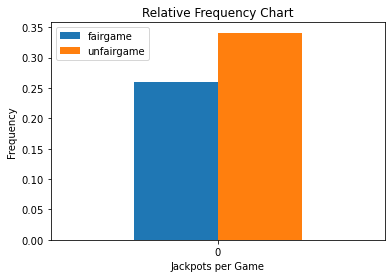

In [10]:
#create one fair coin
fairfaces = ['H', 'T']
faircoin = mc.Die(fairfaces)

#create one unfair coin
unfairfaces = ['H', 'T']
unfaircoin = mc.Die(unfairfaces)

#change weight on unfair coin
unfaircoin.changeweight('H', 5.0)

#create list of die instances to be used in first game
game1coins = [faircoin, faircoin, faircoin]

#create instance of game
game1 = mc.Game(game1coins)

#play game with 1000 "rolls"
game1.play(1000)

#create list of die instances to be used in second game
game2coins = [faircoin, unfaircoin, unfaircoin]

#create second instance of game
game2 = mc.Game(game2coins)

#play second game with 1000 "rolls"
game2.play(1000)

#get number of jackpots in game 1
#create instance for analyzer
analyze1 = mc.Analyzer(game1)
jackpot1 = analyze1.jackpot()

#get number of jackpots in game 2
#create instance for analyzer
analyze2 = mc.Analyzer(game2)
jackpot2 = analyze2.jackpot()

#calculate relative frequency (number of jackpots over number of rolls) for game 1
relFreq1 = jackpot1 / 1000

#calculate relative frequency (number of jackpots over number of rolls) for game 2
relFreq2 = jackpot2 / 1000

#show reults in simple bar chart
compareFreq = {'fairgame': relFreq1,
               'unfairgame': relFreq2}
freqdf = pd.DataFrame(compareFreq, index=[0])

#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
plot1 = freqdf.plot.bar(rot=0, title="Relative Frequency Chart", xlabel="Jackpots per Game", ylabel="Frequency")

## Scenario 2

In [ ]:
Scenario 2: 6-sided die
Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.


In [10]:
from montecarlo import montecarlo as mc

narrow
wide
narrow
wide


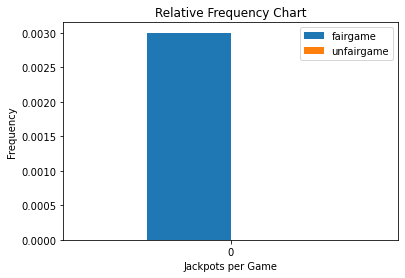

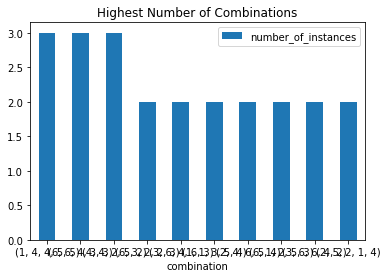

In [17]:
#create one fair die with six sides
diefaces2 = [1, 2, 3, 4, 5, 6]
fairdie1 = mc.Die(diefaces2)

#create two unfair dice
unfairfaces = [1, 2, 3, 4, 5, 6]
unfairdie1 = mc.Die(diefaces2)
unfairdie2 = mc.Die(diefaces2)

#change weight on unfair dice
unfairdie1.changeweight(6, 5.0)
unfairdie2.changeweight(1, 5.0)

#create list of die instances to be used in first game
game3die = [fairdie1, fairdie1, fairdie1, fairdie1, fairdie1]

#create instance of game
game3 = mc.Game(game3die)

#play game with 1000 "rolls"
game3.play(1000)

#create list of die instances to be used in second game
game4coins = [unfairdie1, unfairdie1, unfairdie2, fairdie1, fairdie1]

#create second instance of game
game4 = mc.Game(game4coins)

#play second game with 1000 "rolls"
game4.play(1000)

#get number of jackpots in game 1
#create instance for analyzer
analyze3 = mc.Analyzer(game3)
jackpot3 = analyze3.jackpot()

#get number of jackpots in game 2
#create instance for analyzer
analyze4 = mc.Analyzer(game4)
jackpot4 = analyze4.jackpot()

#calculate relative frequency (number of jackpots over number of rolls) for game 1
relFreq3 = jackpot3 / 1000

#calculate relative frequency (number of jackpots over number of rolls) for game 2
relFreq4 = jackpot4 / 1000

#show reults in simple bar chart
compareFreq1 = {'fairgame': relFreq3,
               'unfairgame': relFreq4}
freqdf1 = pd.DataFrame(compareFreq1, index=[0])
plot2 = freqdf1.plot.bar(rot=0, title="Relative Frequency Chart", xlabel="Jackpots per Game", ylabel="Frequency")

#compute 10 most frequent combinations & plot as a bar chart
combo3 = analyze3.combo()
combo4 = analyze4.combo()

#combine list of combinations into one dataframe
freqCombine = pd.concat([combo3, combo4], axis=0)

#sort by highest number of combinations
sortedCombine = freqCombine.sort_values(by=['number_of_instances'], ascending=False)
sortedCombine.head(10)

#plot as a bar chart
plot3 = sortedCombine.head(10).plot.bar(rot=0, title="Highest Number of Combinations")

## Scenario 3

In [ ]:
Scenario 3: Roman Alphabet
Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
Play a game involving 5 of these dice with 1000 rolls.
Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. Keep a running count; this will result in an estimate of the percent of English words in the data. 

In [57]:
from montecarlo import montecarlo as mc

In [58]:
import string

#create die with alphabet as faces
alphabet = list(string.ascii_lowercase)
letterdie = mc.Die(alphabet)

#weights based on frequency of usage
frequencyList = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 
                 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 
                 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809,
                 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
                 1.7779, 0.2722]

#apply frequency to letter to change die weight accordingly
[letterdie.changeweight(x, y) for x, y in zip(alphabet, frequencyList)]

#create list of die instances to be used in first game
game5die = [letterdie, letterdie, letterdie, letterdie, letterdie]

#create instance of game
game5 = mc.Game(game5die)

#play game with 1000 "rolls"
game5.play(1000)

#Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. 
#Keep a running count; this will result in an estimate of the percent of English words in the data.

#run this code 10 times and count any words that look like an English word
sample1 = game5.playResults.sample(n = 10)
sample1

#running count: 0
#estimate of percent of English words in the data: 0%


die_num,0,1,2,3,4
roll_num,,,,,
698,t,u,e,n,t
477,t,t,l,m,h
263,s,e,a,u,e
531,k,p,a,n,i
446,r,v,t,e,e
280,e,i,c,g,l
213,s,p,a,t,e
745,u,a,a,o,l
55,f,b,i,g,a


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [60]:
!ls -lRF -o

.:
total 156
-rw-r--r-- 1 syc6vs 78487 Nov  8 19:39 FinalProject_syc6vs.ipynb
-rw-r--r-- 1 syc6vs  1054 Nov  5 10:26 LICENSE
drwxr-sr-x 4 syc6vs  2048 Nov  8 19:37 montecarlo/
-rw-r--r-- 1 syc6vs 17185 Nov  8 18:04  montecarlo_demo.ipynb
-rw-r--r-- 1 syc6vs  1032 Nov  6 22:20 montecarlo_test_results.txt
-rw-r--r-- 1 syc6vs  6760 Nov  6 08:09 montecarlo_tests.py
drwxr-sr-x 2 syc6vs   512 Nov  6 08:06 __pycache__/
-rw-r--r-- 1 syc6vs 10074 Nov  8 19:58 README.md
-rw-r--r-- 1 syc6vs   278 Nov  5 11:05 setup.py

./montecarlo:
total 20
-rw-r--r-- 1 syc6vs  274 Nov  8 17:38 __init__.py
-rw-r--r-- 1 syc6vs 7560 Nov  8 19:37 montecarlo.py
drwxr-sr-x 2 syc6vs 1024 Nov  8 17:39 __pycache__/

./montecarlo/__pycache__:
total 16
-rw-r--r-- 1 syc6vs  351 Nov  8 17:39 __init__.cpython-38.pyc
-rw-r--r-- 1 syc6vs 6695 Nov  8 17:13 montecarlo.cpython-38.pyc

./__pycache__:
total 12
-rw-r--r-- 1 syc6vs 6491 Nov  6 08:06 montecarlo.cpython-38.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
!pip install -e .